In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.preprocessing import PolynomialFeatures
from imblearn.over_sampling import SMOTE
import pickle, joblib

In [2]:
df = pd.read_csv('BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [3]:
num = df.select_dtypes(include = 'number')
cat = df.select_dtypes(exclude = 'number')


display(num.head())
display(cat.head())

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue
3,Existing Customer,F,High School,Unknown,Less than $40K,Blue
4,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue


In [4]:
def converter(df):
    df= pd.to_numeric(df, errors = 'coerce')
    return df

df['Income_Category'] = converter(df['Income_Category'])

In [5]:
num = df.select_dtypes(include = 'number')
cat = df.select_dtypes(exclude = 'number')


display(num.head())
display(cat.head())

,CLIENTNUM,Customer_Age,Dependent_count,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,45,3,NaN,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,49,5,NaN,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,51,3,NaN,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,40,4,NaN,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,40,3,NaN,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


,Attrition_Flag,Gender,Education_Level,Marital_Status,Card_Category
0,Existing Customer,M,High School,Married,Blue
1,Existing Customer,F,Graduate,Single,Blue
2,Existing Customer,M,Graduate,Married,Blue
3,Existing Customer,F,High School,Unknown,Blue
4,Existing Customer,M,Uneducated,Married,Blue


In [6]:
from sklearn.preprocessing import LabelEncoder
label_encode = LabelEncoder()

for i in cat:
    if i in df:
        df[i] = label_encode.fit_transform(df[i])
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,1,3,3,1,NaN,0,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,0,5,2,2,NaN,0,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,1,51,1,3,2,1,NaN,0,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,1,40,0,4,3,3,NaN,0,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,1,40,1,3,5,1,NaN,0,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,1,50,1,2,2,2,NaN,0,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,0,41,1,2,6,0,NaN,0,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,0,44,0,1,3,1,NaN,0,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,0,30,1,2,2,3,NaN,0,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


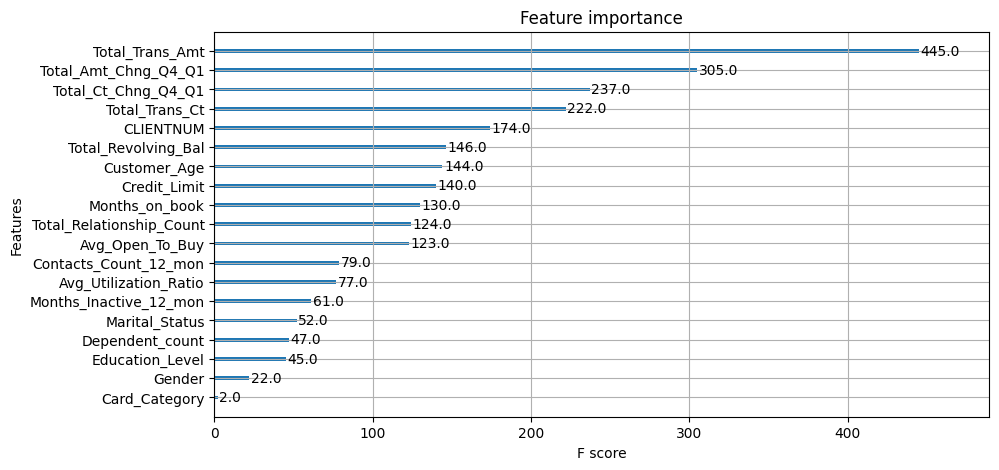

In [7]:
# - Using XGBOOST to find feature importance
import xgboost as xgb
model = xgb.XGBClassifier()

x = df.drop('Attrition_Flag', axis = 1)
y = df.Attrition_Flag

model.fit(x, y)

plt.rcParams['figure.figsize'] = (10, 5)
# Print feature importance scores
xgb.plot_importance(model, importance_type= 'weight')
plt.show()

In [8]:
sel_cols = ['Total_Trans_Amt', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Total_Trans_Ct', 'CLIENTNUM', 'Total_Revolving_Bal', 'Customer_Age', 'Attrition_Flag']
sel_data = df[sel_cols]
sel_data

,Total_Trans_Amt,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1,Total_Trans_Ct,CLIENTNUM,Total_Revolving_Bal,Customer_Age,Attrition_Flag
0,1144,1.335,1.625,42,768805383,777,45,1
1,1291,1.541,3.714,33,818770008,864,49,1
2,1887,2.594,2.333,20,713982108,0,51,1
3,1171,1.405,2.333,20,769911858,2517,40,1
4,816,2.175,2.500,28,709106358,0,40,1
...,...,...,...,...,...,...,...,...
10122,15476,0.703,0.857,117,772366833,1851,50,1
10123,8764,0.804,0.683,69,710638233,2186,41,0
10124,10291,0.819,0.818,60,716506083,0,44,0
10125,8395,0.535,0.722,62,717406983,0,30,0


<Axes: xlabel='Attrition_Flag', ylabel='count'>

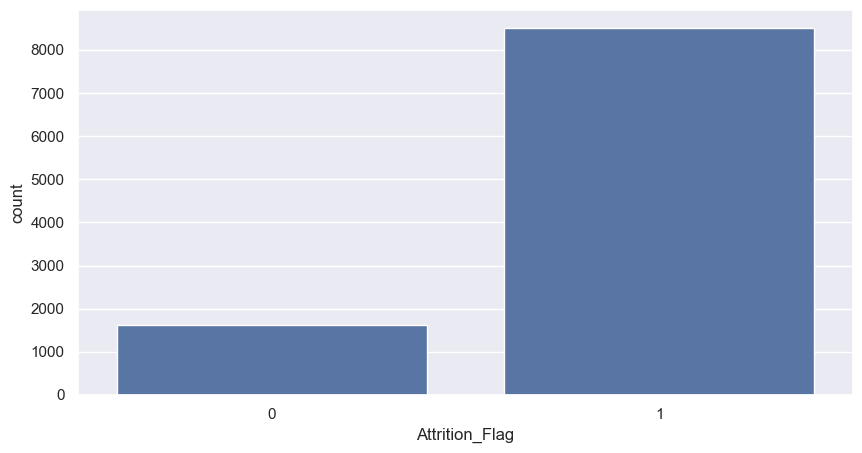

In [9]:
sns.set(style = 'darkgrid')
sns.countplot(x = sel_data.Attrition_Flag)

In [10]:
x = sel_data.drop('Attrition_Flag', axis = 1)
y = sel_data.Attrition_Flag

# split into train and test
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 98, stratify = y)

In [11]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy= 'auto', random_state=80)
X_resampled, y_resampled = smote.fit_resample(xtrain, ytrain)

<Axes: xlabel='Attrition_Flag', ylabel='count'>

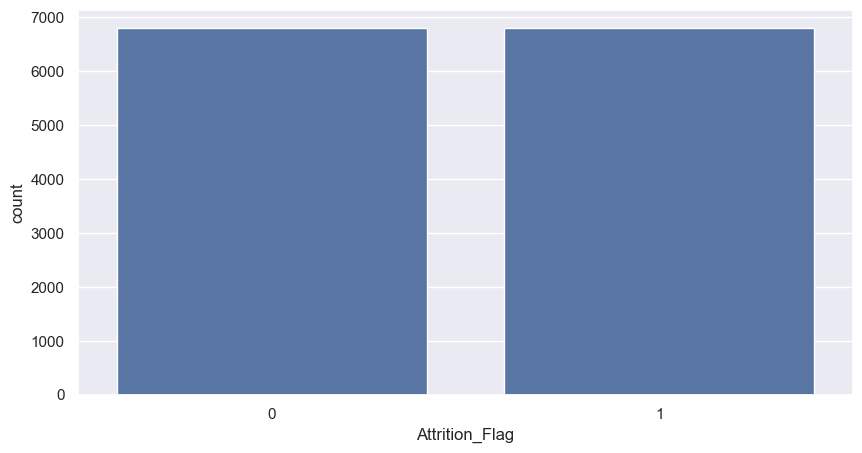

In [12]:
new_balanced_data_smote = pd.concat([X_resampled, y_resampled], axis = 1)

sns.countplot(x = new_balanced_data_smote['Attrition_Flag'])

In [13]:
def modeller(x_train, y_train, x_test, y_test, show_train_score = None):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.tree import DecisionTreeClassifier
    from xgboost import XGBClassifier
    from sklearn.svm import SVC
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import accuracy_score

    # list of algorithms to be used
    algorithms = [RandomForestClassifier(), XGBClassifier(), DecisionTreeClassifier(), SVC(kernel = 'poly'), LogisticRegression()]

    # keep the training and test scores
    scores = []
    train_validator = []

    for i in algorithms:
        model_name = i
        model_name.fit(x_train, y_train)
        model_validate = model_name.predict(x_train)
        train_validator.append(accuracy_score(model_validate, y_train))

        test_perf = model_name.predict(x_test)
        scores.append(accuracy_score(test_perf, y_test))

    # create a table for each algorithms and scores
    compare_table = pd.DataFrame()
    compare_table['Algorithm'] = pd.Series(algorithms)
    compare_table['Accuracy'] = pd.Series(scores)

    if show_train_score == 'show_train':
        compare_table['Training Accuracy'] = pd.Series(train_validator)
        return compare_table.sort_values(by = 'Accuracy', ascending = False), compare_table['Algorithm'][0], compare_table['Algorithm'][1]
    else:
        return compare_table.sort_values(by = 'Accuracy', ascending = False), compare_table['Algorithm'][0], compare_table['Algorithm'][1]


table, model1, model2 = modeller(X_resampled, y_resampled, xtest, ytest, show_train_score = 'show_train')
table

,Algorithm,Accuracy,Training Accuracy
1,"XGBClassifier(base_score=None, booster=None, c...",0.942744,0.996102
0,"(DecisionTreeClassifier(max_features='sqrt', r...",0.931885,1.000000
2,DecisionTreeClassifier(),0.911649,1.000000
4,LogisticRegression(),0.839585,0.500000
3,SVC(kernel='poly'),0.368707,0.533167


In [15]:
# --------- XGBOOST CLASSIFIER MODELLING --------------
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

xgb_model = XGBClassifier()

xgb_model.fit(X_resampled, y_resampled)

cross_validation = xgb_model.predict(X_resampled)
print(classification_report(cross_validation, y_resampled))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      6822
           1       0.99      1.00      1.00      6776

    accuracy                           1.00     13598
   macro avg       1.00      1.00      1.00     13598
weighted avg       1.00      1.00      1.00     13598



In [16]:
print(classification_report(xgb_model.predict(xtest), ytest))

              precision    recall  f1-score   support

           0       0.90      0.78      0.83       377
           1       0.95      0.98      0.97      1649

    accuracy                           0.94      2026
   macro avg       0.93      0.88      0.90      2026
weighted avg       0.94      0.94      0.94      2026



In [18]:
joblib.dump(xgb_model, 'bank_churner_model.pkl')

['bank_churner_model.pkl']

In [19]:
imported_model = joblib.load('bank_churner_model.pkl')
imported_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [20]:
new_customers = df.sample(5).drop('Attrition_Flag', axis = 1)
new_customers

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
4610,710335983,57,0,0,3,0,NaN,0,36,5,1,3,3532.0,869,2663.0,1.038,4297,64,0.778,0.246
2315,714840858,40,0,3,3,3,NaN,0,31,5,2,4,2222.0,1551,671.0,0.932,3302,65,0.585,0.698
2297,809290308,31,0,0,2,1,NaN,0,26,3,1,1,3540.0,1173,2367.0,1.106,1912,45,0.667,0.331
5714,717074283,45,0,3,2,0,NaN,0,37,5,2,6,17678.0,0,17678.0,0.788,2566,49,0.815,0.000
2850,713039808,45,1,4,0,1,NaN,0,32,3,2,1,6637.0,0,6637.0,0.675,1801,48,0.600,0.000


In [22]:
new_customers = new_customers[sel_cols[:-1]]
new_customers

,Total_Trans_Amt,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1,Total_Trans_Ct,CLIENTNUM,Total_Revolving_Bal,Customer_Age
4610,4297,1.038,0.778,64,710335983,869,57
2315,3302,0.932,0.585,65,714840858,1551,40
2297,1912,1.106,0.667,45,809290308,1173,31
5714,2566,0.788,0.815,49,717074283,0,45
2850,1801,0.675,0.600,48,713039808,0,45


In [28]:
imported_model.predict(new_customers)

array([1, 1, 1, 0, 1])

In [29]:
df.iloc[4610]['Attrition_Flag']

1.0

In [30]:
df.iloc[2315]['Attrition_Flag']

1.0

In [31]:
df.iloc[2297]['Attrition_Flag']

1.0

In [32]:
df.iloc[5714]['Attrition_Flag']

0.0

In [33]:
df.iloc[2850]['Attrition_Flag']

1.0